## Advance Statistics
### Basics of Python Programming and Combinatorics

#### 1. Write a function that list all the possible outcomes with five dice.
#### 2. Write a function that takes a number of dices and return all the possible outcomes for that amount of dices.

I will generate a function that takes as input any number of dices, and therefore do both exercises at the same time.

In [1]:
def roll_dices(n):
    """
    This function takes n as the number of dices you want to throw, and return
    all the possible combinations of the roll.
    """
    dice = [1,2,3,4,5,6]
    if n == 0:
        return ['']
    return [str(rolled) + str(new_roll) for rolled in roll_dices(n - 1) for new_roll in dice]

In [ ]:
print (roll_dices(5))

#### 3. Write functions that return, given five dice, True or False if we have Straight, Full, Poker or Generala.

In [2]:
def is_straight(roll):
    """
    This function takes a list of integers as input, and return a boolean
    indicating if the roll is straight
    """
    return len(set(roll)) == len(roll)
    
def is_full(roll):
    """
    This function takes a list of integers and input, and return a boolean
    indicating whether the roll is a full
    """
    values = set(roll)
    if len(values) == 2:
        if roll.count(roll[0]) in [2,3]:
            return True
    else:
        return False
        
def is_poker(roll):
    """
    This function takes a list of integers and input, and return a boolean
    indicating whether the roll is a Poker
    """
    values = set(roll)
    if len(values) == 2:
        if roll.count(roll[0]) in [4,1]:
            return True
    else:
        return False
       
def is_generala(roll):
    """
    This function takes a list of integers and input, and return a boolean
    indicating whether the roll is a Generala
    """
    return len(set(roll)) == 1

In [ ]:
# CELL DESIGNED FOR TESTING

straight = [1,2,3,4,5]
full = [1,1,1,2,2]
generala = [5,5,5,5,5]
poker = [1,1,1,1,5]

# TRUE CASES

print(is_straight(straight))
print(is_full(full))
print(is_poker(poker))
print(is_generala(generala))

# FALSE CASES

print(is_straight(poker))
print(is_full(generala))
print(is_poker(generala))
print(is_generala(poker))


#### 4. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands served.

FALTA POR HACER

#### 5. Compute the probabilities that you already computed by hand by counting the outcomes describing each roll result in the list of all possible hands. 

FALTA POR HACER

#### 6. Write a function that simulate a roll with n fair dices.

In [3]:
import random 

def roll(n):
    """
    This function takes as input a number n of dices, and returns the outcome of the roll
    """
    roll = list()
    for i in range(0,n):
        roll.append(random.randint(1,6))
    return roll

In [ ]:
print(roll(5))

#### 7. Write a function that plays automatically, always looking for a Generala with a greedy strategy (always keeping the most dices of the same kind and rolling the others) that returns True if we get a Generala and a False otherwise. 
#### Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook

In [4]:
import random

def most_frequent(List): 
    "This function takes a List as input and returns you the most frequent value"
    return max(set(List), key = List.count)

def play_generala(n):
    """
    This function takes a number n of dices and plays until all the dices are the same value.
    """
    result = roll(n)
    print ("The starting roll is:", result)
    while is_straight(result):
        #print ("Roll is straight:", result, "Re-rolling again.")
        result = roll(n)
    most_freq = most_frequent(result)
    print ("The value we try to get is:", most_freq)
        
    while not is_generala(result):
        print ("Roll is not generala" , result, " ---> Rolling not number", most_freq,  "dices.")
        result = [random.randint(1,6) for item in result if item != most_freq]
        print ("Values obtained from the re-roll are the next ones:", result)
    
    while len(result) == 1:
        last_roll = random.randint(1,6)
        print ("Only one dice remain, result of re-roll is:", last_roll)
        if last_roll == most_freq:
            return ("Obtained value", most_freq, "is generala!")
    
    return ("Is generala!:", result)    
    
print(play_generala(4))

The starting roll is: [2, 3, 6, 1]
The value we try to get is: 5
Roll is not generala [4, 3, 5, 5]  ---> Rolling not number 5 dices.
Values obtained from the re-roll are the next ones: [6, 6]
('Is generala!:', [6, 6])


FALTA POR HACER EL HISTOGRAMA; PERO DE QUE??

#### 8. Write a function that plays until it gets a Generala, count how many times it had to play to get it and return this number. Which kind of distribution follow this function results? Explain your reasoning within the delivered python notebook.

In [12]:
def count_play_generala(n):
    """
    This function takes a number n of dices and plays until all the dices are the same value.
    Then it returns the time of number it had to roll the dices.
    """
    result = roll(n)
    counter = 1
    while is_straight(result):
        result = roll(n)
        counter += 1
    most_freq = most_frequent(result)
        
    while not is_generala(result):
        result = [random.randint(1,6) for item in result if item != most_freq]
        counter += 1
    
    while len(result) == 1:
        last_roll = random.randint(1,6)
        counter += 1
        if last_roll == most_freq:
            return (counter)
    
    return (counter)    
    
print(count_play_generala(4))

2


Now we need to repeat the function X times, and after that compute the Histogram of values.

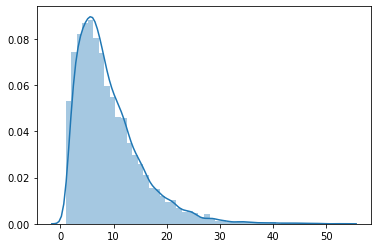

In [18]:
%matplotlib inline
import seaborn as sns

result_list = list()

for _ in range(0,10000):
    result_list.append(count_play_generala(5))
    
sns.distplot(result_list, kde=True)